# COGS 108 - Final Project: Group 41

# Overview

Our analysis generated condensed quarterback stat-driven data and used win percentages as a team success metric to try and prove a correlation between quarterback success and overall team success. Our team extracted data from a large dataset in order to quantify quarterback stats in a manner that  made data visualization more feasible. We also manually calculated win percentages by performing the appropriate mathematical equations to use wins over the course of a season and then using that value in calculating the mean across four seasons. Through our statistical analyses, we found a correlation between most quarterback stats and team win percentage thus providing a more robust answer in support of our hypothesis. 

# Names

- Nicholas McCutcheon A15390464
- Christian Flores A15467046
- Joshua Fierro A15429278

<a id='research_question'></a>
# Research Question

Is there a statistically significant relationship between an NFL team’s quarterback’s performance (i.e., pass yards, pass touchdowns, interceptions, and completion percentage), and the success of the team overall (i.e. average team win percentage)?

<a id='background'></a>

## Background & Prior Work

The NFL is a professional football league that consists of 32 teams. Moreover, the NFL is also the professional sports league with the highest average per game attendance, drawing in more than 66 thousand spectators on average per game and over 16 million in total throughout the season (stats taken from the 2019 season). With such a prestigious sports league hosted in our very own country, it is interesting to seek how each NFL franchise performs every year and why certain organizations are more successful than others. Therefore, our research question brings into examination a possible cause for a given team’s overall success in the league. Does team success rely on the influence of arguably the most important franchise position, quarterback, or is it entirely dependent on other organizational leaders such as head coach, general manager, and/or team owner? 
Our analysis will consist of looking at years of quarterback stats-driven data in an effort to put forth a correlational relationship between quarterback success and overall team success. The Harvard Business Review weighed in on this topic by searching for correlations between win-loss team records over a number of seasons and the performance of four fundamental franchise positions: owner, general manager, head coach, and quarterback . After examining the influence of the four individuals across multiple teams, it was concluded that the quarterback appears to be the most critical factor in team success (Groysberg et al., 2019). Furthermore, an undergraduate at the University of Arkansas proposed a similar question in his honors thesis. In “The Relationship of Quarterback Stability and Success in the NFL” (2012), Jeffrey Wittke takes a closer look at the relationship between stability at the quarterback position and success of an NFL organization. His research shows that there is in fact a strong correlation between quarterback-related changes and winning percentages for a team over the span of a number of seasons. Therefore, the importance placed on the quarterback position is in fact warranted and the trend even continues to prove to be truthful in the most recent of seasons. Our project aims to provide further support to these findings.

References (include links):

1) Harvard Business Review: Who’s the Most Important Member of an NFL Franchise? 

    https://hbr.org/2019/04/whos-the-most-important-member-of-an-nfl-franchise#

2) Honor's Thesis: The Relationship of Quarterback Stability and Success in the NFL

    https://core.ac.uk/download/pdf/72840043.pdf

# Hypothesis


Given the importance of the quarterback position in NFL (as seen by their level of pay, and public perspective) we think there is a significant relationship between quarterback performance (i.e., pass yards, pass touchdowns, interceptions, completion percentage.) and overall team success. Due to the nature of the quarterback’s critical impact on football teams in the past as suggested by previous studies (links provided above), we think that we will find substantial proof of quarterback performance influencing overall team success in a positive manner.

# Dataset(s)

- Dataset Name: nfl_nextgenstats_data - Weekly data scraped from NFL Next Gen Stats website from 2016-present
- Link to the dataset: https://github.com/Deryck97/nfl_nextgenstats_data/tree/master/data
- Number of observations: ~2000

The dataset includes weekly data scraped from the NFL Next Gen Stats website, which we cross-checked against the site itself to ensure the data from this repo was accurate. The datasets include quarterback performance (i.e., aggressiveness rating, pass attempts, average Air Distance, average Air Yards Differential, average Air Yards to Sticks, average Completed Air Yards, average Intended Air Yards, average Time To Throw, Completion Percentage, Complete Percentage Above Expectations, Completions, expected Completion Percentage, Interceptions, Max Air Distance, Max Completed Air Distance, Pass Touchdowns, Pass Yards, Passer Rating, Season Type, and Week Number) across all teams for week during the regular season. There are four datasets to represent the data for each year from 2016-2019 (2020 was not used as it does not have complete season data). Each year or dataset has an average of 500 observations. Therefore, there are roughly 2,000 observations that are being taken into consideration within this project. We will simply import each dataset as is in order to get a good scope of quarterback performance over the course of 4 years of National League Football. No transformations will take place since we will be looking at the wide range of quarterback performance stats described above.

# Setup

In [2]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import ttest_ind

In [3]:
#read in each year of data
ngs16 = "https://raw.githubusercontent.com/Deryck97/nfl_nextgenstats_data/master/data/nextgen_2016.csv"
ngs17 = "https://raw.githubusercontent.com/Deryck97/nfl_nextgenstats_data/master/data/nextgen_2017.csv"
ngs18 = "https://raw.githubusercontent.com/Deryck97/nfl_nextgenstats_data/master/data/nextgen_2018.csv"
ngs19 = "https://raw.githubusercontent.com/Deryck97/nfl_nextgenstats_data/master/data/nextgen_2019.csv"
df_ngs16 = pd.read_csv(ngs16)
df_ngs17 = pd.read_csv(ngs17)
df_ngs18 = pd.read_csv(ngs18)
df_ngs19 = pd.read_csv(ngs19)

#combine all years
frames = [df_ngs16,df_ngs17,df_ngs18,df_ngs19]
df_allyears = pd.concat(frames)
display(df_allyears)

,shortName,playerName,aggressiveness,attempts,avgAirDistance,avgAirYardsDifferential,avgAirYardsToSticks,avgCompletedAirYards,avgIntendedAirYards,avgTimeToThrow,...,interceptions,maxAirDistance,maxCompletedAirDistance,passTouchdowns,passYards,passerRating,season,seasonType,week,teamId
0,C.Wentz,Carson Wentz,21.621622,37,22.610488,0.618784,-0.982162,9.015000,8.396216,2.581027,...,0,56.246900,48.116551,2,278,100.957207,2016,REG,1,3700
1,A.Rodgers,Aaron Rodgers,20.588235,34,25.449157,-3.132500,2.626176,7.552500,10.685000,2.903265,...,0,53.187623,39.118427,2,199,95.098039,2016,REG,1,1800
2,J.Winston,Jameis Winston,34.375000,32,22.169704,-2.215802,1.746563,8.218261,10.434062,2.836094,...,1,50.717915,50.717915,4,281,125.130208,2016,REG,1,4900
3,M.Mariota,Marcus Mariota,34.146341,41,21.098710,-0.870351,-0.350732,7.071600,7.941951,2.510073,...,1,38.738542,36.726190,2,271,86.534553,2016,REG,1,2100
4,R.Griffin,Robert Griffin III,15.384615,26,26.490124,-1.805256,3.206154,10.631667,12.436923,2.570846,...,1,61.977435,61.977435,0,190,54.967949,2016,REG,1,1050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,P.Mahomes,Patrick Mahomes,8.000000,25,18.163800,0.976625,-2.836000,6.660625,5.684000,2.988160,...,1,47.201450,47.201450,1,174,81.083333,2019,REG,17,2310
513,R.Wilson,Russell Wilson,27.500000,40,20.875998,-0.862274,-1.156316,6.297200,7.159474,2.993974,...,0,39.192492,35.106536,2,233,95.104167,2019,REG,17,4600
514,J.Goff,Jared Goff,15.555556,45,20.587565,-1.835149,-0.658864,6.596897,8.432045,2.775511,...,0,47.343977,38.622338,3,319,107.546296,2019,REG,17,2510
515,C.Keenum,Case Keenum,29.729730,37,19.564161,-0.746095,-2.444857,5.723333,6.469429,2.846108,...,1,38.468976,37.536715,1,206,63.569820,2019,REG,17,5110


# Data Cleaning

We have determined that aside from the player's names, the four key factors that would be most helpful in analyzing this data are the pass yards, pass touchdowns, interceptions, and completion percentage, as these four factors are the most indicative of a quarterback's success. In addition, we have decided to keep the season, season type, and week (in the season), as well as the names of the players so we can determine the success of each quarterback at different points in time.

### Data Cleaning: Round 1/2

In [4]:
#remove all unneeded columns/factors
df_allyears = df_allyears.loc[:,['shortName','playerName','season','seasonType','week','passYards','passTouchdowns','interceptions','completionPercentage']]
display(df_allyears)

,shortName,playerName,season,seasonType,week,passYards,passTouchdowns,interceptions,completionPercentage
0,C.Wentz,Carson Wentz,2016,REG,1,278,2,0,59.459459
1,A.Rodgers,Aaron Rodgers,2016,REG,1,199,2,0,58.823529
2,J.Winston,Jameis Winston,2016,REG,1,281,4,1,71.875000
3,M.Mariota,Marcus Mariota,2016,REG,1,271,2,1,60.975610
4,R.Griffin,Robert Griffin III,2016,REG,1,190,0,1,46.153846
...,...,...,...,...,...,...,...,...,...
512,P.Mahomes,Patrick Mahomes,2019,REG,17,174,1,1,64.000000
513,R.Wilson,Russell Wilson,2019,REG,17,233,2,0,62.500000
514,J.Goff,Jared Goff,2019,REG,17,319,3,0,64.444444
515,C.Keenum,Case Keenum,2019,REG,17,206,1,1,48.648649


# Data Analysis & Results

#### Extended data cleaning:

We have determined that aside from the player's names, the four key factors that would be most helpful in analyzing this data are the pass yards, pass touchdowns, interceptions, and completion percentage, as these four factors are the most indicative of a quarterback's success. In our first round of processing the large dataset, we decided to only keep the season, season type, and week (in the season), as well as the names of the players so we can determine the success of each quarterback at different points in time.

As our analysis progressed, we realized it would be necessary to condense all of the weekly data into a more practicable form. Therefore, we decided to take the mean for each quarterback stat as well as team success measurement (win percentage) for each quarterback and team over the course of four seasons: 2016 - 2017 regular season, 2017 - 2018 regular season, 2018 - 2019 regular season, and 2019 - 2020 regular season. Our team was able to calculate the  win percentage by dividing the number of regular season wins for a particular team by the amount of total games they played in that season. Then we simply took the average of all of those mean values over the course of all four seasons. We excluded the most recent season because it would have created gaps in our data since the collection of data was halted due to a period of inactivity during the COVID-19 pandemic. Moreover, we selected eight representative quarterbacks that we believed would either make or break our hypothesis. We included arguably four of the best franchise quarterbacks: Tom Brady, Aaron Rodgers, Drew Brees, and Ben Roethlisberger. We also included four decent quarterbacks:  Matt Ryan, Jameis Winston, Russell Wilson, and Dak Prestcott. However, it should be noted that the previous two sentences are subjective observations made from available data. We chose these specific quarterbacks because they stayed consistent and played with the same team across all four years. It would’ve been an exhaustive and less focused analysis to try and establish correlations between all quarterbacks that played over the course of the four seasons (a total of 96 quarterbacks). This is because obviously not all quarterbacks are inherent to team success, sometimes second string quarterbacks are filling in for injured quarterbacks or because of some other minor reason. In essence, we conducted this data cleaning so that the massive set of data would not skew our analysis.


#### What distributions do your variables take?

All of our data is visualized through scatterplots. We simply made four different visualizations to attempt to establish some type of correlation between a given quarterback statistic (e.g., pass yards, pass touchdowns, interceptions, completion percentage) and overall team success (win percentage).

#### Are there any outliers?

There are no easily visible outliers because of the nature of our distributions. It would be a mistake to declare outliers in our visualizations only because most quarterbacks have stats that fall within a reasonable range. In addition, we chose to analyze the few quarterbacks that played consistently throughout their careers for the same team. Choosing to analyze the four major stats does not allow for any real outliers in our data visualization. Both the parameters of our data set and analysis ensure to eliminate outliers and confounds.

#### Any relationships between variables?

After simply looking at our visualizations, no given quarterback statistic is indicative of the overall team success. Following our EDA methods and respective analyses,  our results prove that there is in fact a correlation between quarterback success as quantified by a certain stat and overall team success. Our t-tests for each visualization provide substantial evidence to establish a correlation between quarterback success and overall team success. These results will be further elaborated upon in our Conclusion and Discussion section below. 

### Data Cleaning: Round 2/2

In [4]:
#sort dataframe by player name, then season, then week
df_allyears = df_allyears.sort_values(by=['playerName','season','week'])

#get average passYards, passTouchdowns, interceptions, and completionPercentage per player over the course of all data available
df_condensed = df_allyears.groupby(['playerName']).mean()

#get rid of week and season, as they no longer mean anything
df_condensed = df_condensed.drop(['week','season'], axis=1)

#remove all players except those we are interested in
df_condensed = pd.DataFrame(df_condensed,index=[
    "Aaron Rodgers",
    "Tom Brady",
    "Jameis Winston",
    "Matt Ryan",
    "Dak Prescott",
    "Drew Brees",
    "Ben Roethlisberger",
    "Russell Wilson"])

#add in win/loss ratio (win percentage out of total # games) and team, which were manually calculated from other available data
df_condensed['winPercent']=[
    0.57050,
    0.78150,
    0.40675,
    0.54000,
    0.62525,
    0.68800,
    0.64875,
    0.63300]

df_condensed['team']=[
    'GB',
    'NE',
    'TB',
    'ATL',
    'DAL',
    'NO',
    'PIT',
    'SEA']

#sort once more by winPercent and clean up long decimals
df_condensed = df_condensed.sort_values(by=['winPercent'])
df_condensed = df_condensed.round(4)
df_condensed

,passYards,passTouchdowns,interceptions,completionPercentage,winPercent,team
Jameis Winston,288.2778,1.8333,1.3519,62.7276,0.4068,TB
Matt Ryan,292.5238,1.8889,0.6508,67.5283,0.5400,ATL
Aaron Rodgers,273.6415,2.0189,0.3585,63.8936,0.5705,GB
Dak Prescott,249.8413,1.5397,0.5714,66.4852,0.6252,DAL
Russell Wilson,246.2500,1.8906,0.5312,64.7409,0.6330,SEA
Ben Roethlisberger,288.3191,1.9362,0.9362,65.2191,0.6488,PIT
Drew Brees,289.1053,2.0877,0.5263,72.7280,0.6880,NO
Tom Brady,275.7000,1.8833,0.4833,64.9146,0.7815,NE


### EDA 1/4: Pass Yards vs. Win Percentage

t val: 42.70097044957404
p val: 3.1339725906219804e-16
Significant difference (p < 0.01)


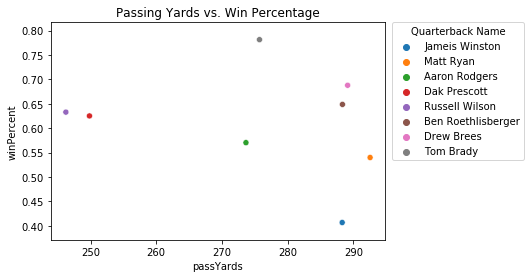

In [10]:
#plot pass yards vs. winPercent
pYards = sns.scatterplot(x = 'passYards', y = 'winPercent', hue = df_condensed.index, data = df_condensed)
pYards.set(title="Passing Yards vs. Win Percentage")
pYards.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Quarterback Name")

#label each data point (unused for now)
#for i in range(len(df_condensed.index)):
    #pYards.text(df_condensed['passYards'][i],df_condensed['winPercent'][i],df_condensed.index[i])
    
#create lists from columns for t-test
pYardsList = df_condensed["passYards"].tolist()
winPList = df_condensed["winPercent"].tolist()

#perform t-test
t_val,p_val = stats.ttest_ind(pYardsList,winPList)

#automatically display test results
if p_val < 0.01:
    print('t val:',t_val)
    print('p val:',p_val)
    print('Significant difference (p < 0.01)')
else:
    print('t val:',t_val)
    print('p val:',p_val)
    print('No significant difference (p > 0.01)')

#### Interpretation of graph and analysis: Pass Yards vs. Win percentage

Here, the p-value is far less than one and the t-value is very high, indicating a very strong correlation between pass yards and win percentage. This makes sense and could serve to support our hypothesis. Pass yards measures the amount of yards gained by an offensive team on completed passes, which essentially indicates how much ground the team with the ball gains due to the actions of the quarterback. The higher a quarterback's pass yards, in general, the better they are considered to be. Thus, this strong correlation between pass yards and team success (win percentage) could serve to support our hypothesis. 

### EDA 2/4: Pass Touchdowns vs. Win Percentage

t val: 18.366033759938855
p val: 3.403219510394418e-11
Significant difference (p < 0.01)


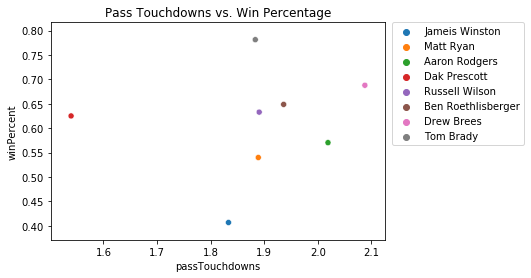

In [11]:
#plot pass touchdowns vs. winPercent
pTouch = sns.scatterplot(x = 'passTouchdowns', y = 'winPercent', hue = df_condensed.index, data = df_condensed)
pTouch.set(title="Pass Touchdowns vs. Win Percentage")
pTouch.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
#create lists from columns for t-test
pTouchList = df_condensed["passTouchdowns"].tolist()
winPList = df_condensed["winPercent"].tolist()

#perform t-test
t_val,p_val = stats.ttest_ind(pTouchList,winPList)

#automatically display test results
if p_val < 0.01:
    print('t val:',t_val)
    print('p val:',p_val)
    print('Significant difference (p < 0.01)')
else:
    print('t val:',t_val)
    print('p val:',p_val)
    print('No significant difference (p > 0.01)')

#### Interpretation of graph: Pass Touchdowns vs. Win percentage

Here, the p-value is again far less than one and the t-value is again very high, indicating a very strong correlation between pass touchdowns and win percentage. This again makes sense and could serve to support our hypothesis. Pass touchdowns occur when a quarterback throws the ball to a player who is either in the end zone or would be able to reach the end zone after receiving the pass. This essentially means that each pass touchdown is an instance where an opportunity to earn points is converted into those points through the actions of the quarterback. The more average pass touchdowns a quarterback has, in general, the better they are considered to be. Thus, this strong correlation between pass touchdowns and team success (win percentage) could serve to support our hypothesis. 

### EDA 3/4: Interceptions vs. Win Percentage

t val: 0.5384528174013011
p val: 0.5987219204615393
No significant difference (p > 0.01)


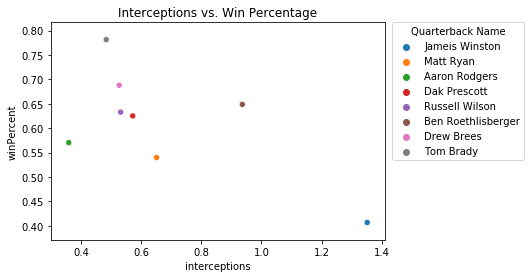

In [12]:
#plot interceptions vs. winPercent
pInter = sns.scatterplot(x = 'interceptions', y = 'winPercent', hue = df_condensed.index, data = df_condensed)
pInter.set(title="Interceptions vs. Win Percentage")
pInter.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Quarterback Name")

#create lists from columns for t-test
pInterList = df_condensed["interceptions"].tolist()
winPList = df_condensed["winPercent"].tolist()

#perform t-test
t_val,p_val = stats.ttest_ind(pInterList,winPList)

#automatically display test results
if p_val < 0.01:
    print('t val:',t_val)
    print('p val:',p_val)
    print('Significant difference (p < 0.01)')
else:
    print('t val:',t_val)
    print('p val:',p_val)
    print('No significant difference (p > 0.01)')

#### Interpretation of graph: Interceptions vs. Win percentage

Here, we see that the p-value is above 0.01 and the t-value is quite small, indicating no significant correlation between interceptions and win percentage. However, this also makes sense and could serve to support our hypothesis. The reason for this is that unlike our other measurement statistics, more interceptions actually means a quarterback's passes are being intercepted by the enemy team more often than they are being received by a teammate, so fewer interceptions would actually indicate a better quarterback. Thus, since there is no correlation between more interceptions and higher win percentage, the result of this t-test could serve to support our hypothesis. 

### EDA 4/4: Completion Percentage vs. Win Percentage

t val: 60.06129013257632
p val: 2.708062648191503e-18
Significant difference (p < 0.01)


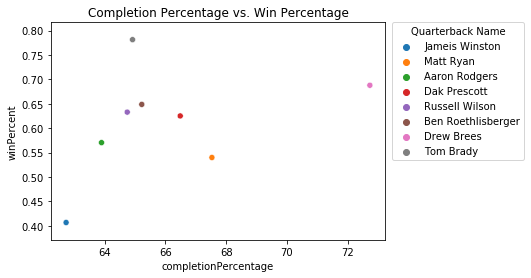

In [13]:
#plot completion percentage vs. winPercent
pCP = sns.scatterplot(x = 'completionPercentage', y = 'winPercent', hue = df_condensed.index, data = df_condensed)
pCP.set(title="Completion Percentage vs. Win Percentage")
pCP.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Quarterback Name")

#create lists from columns for t-test
pCPList = df_condensed["completionPercentage"].tolist()
winPList = df_condensed["winPercent"].tolist()

#perform t-test
t_val,p_val = stats.ttest_ind(pCPList,winPList)

#automatically display test results
if p_val < 0.01:
    print('t val:',t_val)
    print('p val:',p_val)
    print('Significant difference (p < 0.01)')
else:
    print('t val:',t_val)
    print('p val:',p_val)
    print('No significant difference (p > 0.01)')

#### Interpretation of graph: Completion Percentage vs. Win percentage

Lastly, here we once again see that the p-value is far less than one and the t-value is once more very high, indicating a very strong correlation between completion percentage and win percentage. This again makes sense and could serve to support our hypothesis. Completion percentage is a measure of how many of a quarterback's passes are successfully received by a teammate, meaning that the higher a quarterback's completion percentage is, in general, the better they are considered to be. Thus, this strong correlation between completion percentage and team success (win percentage) could serve to support our hypothesis. 

# Ethics & Privacy

#### Data Collection
Our datasets come from sources which do not contain any personally identifiable information other than players’ names, which are necessary to some extent to determine what position a given player is (for example, if they are a quarterback). The data comes from publicly available sources such as the NFL itself, and no other personal information was collected.

#### Data Storage
The data we have used in this project is not stored in any other locations other than this notebook and the sources from which the data were obtained. Thus, no data is being stored in a location that would raise any ethics or privacy concerns, as this notebook is viewable on a public repo.

#### Analysis
No personal information has been gathered aside from player names throughout our investigation since they are necessary for our analysis (to determine which position a given player holds). All visualizations and summary statistics have been created with objectivity in mind to avoid misrepresenting our findings. Our analysis process has been documented in this project to the best of our ability such that it could be reproduced.

#### Modeling
Although we were unable to incorporate every quarterback into our analysis, this is for good reason. In order to gather the exact same data from multiple players, we needed to eliminate quarterbacks that were missing seasons, were traded, or otherwise does not have consistent data from 2016-2019, as part of our analysis involves calculating performance averages across those four years. Thus, the players we eliminated were eliminated in order to make sure the players we did analyze had identical sets of data available.

#### Deployment
Should there arise a situation where our data or the results of our data analysis would cause harm to those players involved or the entities that manage them or are affiliated with them, this data will be removed from public view.

# Conclusion & Discussion

**Limitations:** The primary limitation of our project is the number of quarterbacks we were able to use. As explained above, in order to make sure we were comparing quarterbacks with identical available datasets, we were forced to reject quarterbacks who did not play on the same team consistently for all four years of available data. In addition, the win percentage for each player/team needed to be calculated manually from other available team success data from all four years, so that placed a limitation on how many players we could reasonably support. 

Another limitation could be the way in which our data was visualized. While our t-tests provide a more clear picture of the correlation between factors, unless you know what to look for, it is not immediately clear from our visualizations whether or not these factors correlate despite our best efforts to display the data in a way that portrays it accurately and without bias.

**Discussion:** There are certainly improvements that could be made to this project were it to be redone or continued in the future. The first and likely most beneficial improvement would be to increase the number of quarterbacks that are included in our analysis. While we believe the eight players we've selected are sufficient to draw conclusions for the time being, adding more players would provide more data for the t-tests and increase the validity of the tests' results. This would also make the presence of outliers more known, as while it may appear from looking at our visual representations that outliers are present, they are actually within the reasonably acceptable range of values one would expect for the factors we used in our analysis, but adding more players would either confirm or disprove this statement.

Additionally, more statistical analysis could be performed on our data to help legitimize or disprove the correlations we have discovered through our analysis with simple t-tests. Increasing the variety of tests used to test our hypothesis would help to strengthen (or even disprove, in the case that further analysis were to suggest that our current results to not indicate significant correlation) our conslusions.

Lastly, the depth of our analysis of team success could be improved upon by looking at other factors rather than simply win percentage. This change would increase the granularity of our analysis for overall team success, ultimately adding legitimacy to our results.  

**Conclusions:**  In conclusion, the results of our data visualizations and t-test statistical analyses suggest that while there is no one single factor that can be used to indicate quarterback success, team success can likely be indicated by quarterback success. Our t-tests suggest that all factors such as pass yards, pass touchdowns, and completion percentage (all of which should indicate better quarterback performance as their values rise) do in fact correlate to team success, and the one negative factor we tested for (interceptions, which would indicate worse quarterback performance as its value rises) did not correlate with team success. What this means is that where we expected our tests to indicate correlation between quarterback success and team success, they did, and where we expected them not to indicate correlation, they did not. **Thus, our analysis has failed to reject the null hypothesis that quarterback success is not indicative of overall team success.** 

# Team Contributions

- Nicholas McCutcheon: Jupyter Notebook editing & coding/github repo uploads
- Christian Flores: Data analysis/project coordination
- Joshua Fierro: Data gathering